# Lab 6: Model Deployment - Elen

**Name**: Elen Tesfai  
**Date**: April 04, 2025  
**Purpose**: This notebook demonstrates the process of deploying a trained machine learning model using Flask and serving it as a web API. The two models involved are:
1. Linear Regression for predicting weight from height.
2. Logistic Regression for classifying Iris flowers based on features.

---

## 1. Environment Setup

This section installs the necessary libraries and sets up the Flask server.

```python
# Install required libraries
!pip install flask scikit-learn numpy pandas matplotlib

## 2. Loading Trained Models

In this section, we will load the trained models that we will serve via the Flask API. These models have already been trained and saved using `pickle`. We will load them into memory so that we can use them for predictions in the Flask application.

In [11]:
import pickle
import os

# Verify that the current working directory is correct
print("Current Working Directory:", os.getcwd())

# Load the weight prediction model (Linear Regression)
try:
    with open('C:/Projects/flask_model_deployment/finalized_model.sav', 'rb') as f:  # Adjust path
        weight_model = pickle.load(f)
    print("Weight prediction model loaded successfully.")
except FileNotFoundError:
    print("Error: 'finalized_model.sav' not found. Please ensure the file is in the correct directory.")

# Load the Iris classification model (Logistic Regression)
try:
    with open('C:/Projects/flask_model_deployment/iris_model.sav', 'rb') as f:  # Adjust path
        iris_model = pickle.load(f)
    print("Iris classification model loaded successfully.")
except FileNotFoundError:
    print("Error: 'iris_model.sav' not found. Please ensure the file is in the correct directory.")

Current Working Directory: c:\Projects\flask_model_deployment\Lab6-Model-Deployment
Weight prediction model loaded successfully.
Iris classification model loaded successfully.


## 3. Flask Application Setup

Now that your models are loaded successfully, you’ll move on to creating the Flask API that will serve these models for predictions. Follow these steps:

### 3.1 Setting Up Flask

To set up the Flask application, follow these steps:

### 1. **Install Flask**:
   
   If you haven’t already installed Flask, use the following command to install it in your virtual environment:
   
   ```bash
   pip install flask
   This part is redundant, as the Flask setup is handled in `app.py`, and you don't need to repeat the Flask setup instructions in the notebook.
```
### 2. ** Keep the Progress Steps for Model Evaluation in the Notebook **:

You can leave the evaluation and analysis scripts I shared in the notebook. This will help you perform the analysis (like comparing models, plotting results, and testing the Flask API).

After removing the redundant Flask setup section, your notebook will be clean and focused on the necessary analysis for **model performance** and **Flask server testing**.

### **"Training and Saving a Pipeline Model for Linear Regression"**

This title accurately reflects the steps in the script, which include:

- **Creating a dataset** with height and weight.
- **Splitting the data** into training and test sets.
- **Building a pipeline** with scaling and a linear regression model.
- **Training the model** and saving it for future use.

In [17]:
import pandas as pd

# Create a simple example dataset
data = pd.DataFrame({
    'height': [150, 160, 170, 180, 190],  # Example heights in cm
    'weight': [50, 60, 70, 80, 90]        # Example weights in kg
})

# Save this data to a CSV (optional)
data.to_csv('your_data.csv', index=False)

# Now you can proceed with the rest of the code
X = data[['height']]  # Features (input data)
y = data['weight']    # Target variable (output)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

pipe_model = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('regressor', LinearRegression())  # Model step
])

# Train the pipeline model
pipe_model.fit(X_train, y_train)

# Save the trained model to a file
import pickle
with open('C:/Projects/flask_model_deployment/pipe_model.sav', 'wb') as f:
    pickle.dump(pipe_model, f)

print("Model trained and saved successfully!")

Model trained and saved successfully!


## **Progress 1 - Screenshot of the Pipeline Model Results**

In this step, you need to display the performance metrics of your trained pipeline model. The following script will calculate and display the performance metrics such as **Mean Absolute Error (MAE)**, **Root Mean Squared Error (RMSE)**, **Mean Squared Error (MSE)**, and **R-squared (R²)** for both the **training** and **test** datasets:


In [18]:
# Load the trained pipeline model
with open('C:/Projects/flask_model_deployment/pipe_model.sav', 'rb') as f:
    pipe_model = pickle.load(f)

# Evaluate on training data
y_train_pred = pipe_model.predict(X_train)
print('Training Data Performance:')
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('R^2:', r2_score(y_train, y_train_pred))

# Evaluate on test data
y_test_pred = pipe_model.predict(X_test)
print('Test Data Performance:')
print('MAE:', mean_absolute_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('R^2:', r2_score(y_test, y_test_pred))

Training Data Performance:
MAE: 1.7763568394002505e-15
RMSE: 3.552713678800501e-15
MSE: 1.262177448353619e-29
R^2: 1.0
Test Data Performance:
MAE: 0.0
RMSE: 0.0
MSE: 0.0
R^2: nan


c:\Users\su_te\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


### Explanation of the Results for Progress 1 - Screenshot of the Pipeline Model Results:

- **Training Data Performance**:
  - **MAE (Mean Absolute Error)**: `1.7763568394002505e-15`, which is a very small value, indicating that the model's predictions are extremely close to the true values.
  - **RMSE (Root Mean Squared Error)**: `3.552713678800501e-15`, which is also a very small value, further confirming the model's excellent performance on the training data.
  - **MSE (Mean Squared Error)**: `1.262177448353619e-29`, an extremely small number, indicating that the error is negligible.
  - **R² (R-squared)**: `1.0`, meaning that the model explains 100% of the variance in the training data, showing a perfect fit.

- **Test Data Performance**:
  - **MAE, RMSE, MSE**: All values are `0.0`, indicating that the model made perfect predictions on the test data (which is quite rare for a real-world model).
  - **R²**: **NaN (Not a Number)** due to an issue with the test set. R² is not well-defined with fewer than two samples. This warning appears because the model is evaluated on a very small test set.

### Issue:
- The **NaN for R²** in the test data occurs because the test set likely contains only one sample, and the R² calculation is undefined in such cases.

### Solution:
- **Increase the test size**: To avoid this issue, ensure that the test set contains at least two samples (e.g., use `test_size=0.2` to allocate more data to the test set).

## Progress 2 - Compare Linear with Pipeline Performance

In this step, you compare the performance of the pipeline model with that of a simple linear regression model. Here's the script for comparing both models:

In [19]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict with the linear regression model
y_train_lr_pred = lr_model.predict(X_train)
y_test_lr_pred = lr_model.predict(X_test)

# Evaluate performance of linear regression model
print("Linear Regression Training Performance:")
print('MAE:', mean_absolute_error(y_train, y_train_lr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_lr_pred)))
print('MSE:', mean_squared_error(y_train, y_train_lr_pred))
print('R^2:', r2_score(y_train, y_train_lr_pred))

print("Linear Regression Test Performance:")
print('MAE:', mean_absolute_error(y_test, y_test_lr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_lr_pred)))
print('MSE:', mean_squared_error(y_test, y_test_lr_pred))
print('R^2:', r2_score(y_test, y_test_lr_pred))

Linear Regression Training Performance:
MAE: 0.0
RMSE: 0.0
MSE: 0.0
R^2: 1.0
Linear Regression Test Performance:
MAE: 0.0
RMSE: 0.0
MSE: 0.0
R^2: nan


c:\Users\su_te\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


### Explanation of the Results:

- **Training Data**:
  - **MAE, RMSE, MSE**: All 0, indicating perfect predictions.
  - **R²**: 1.0, meaning the model fits the training data perfectly.

- **Test Data**:
  - **MAE, RMSE, MSE**: All 0, indicating perfect predictions on the test data (which is unlikely with such a small dataset).
  - **R²**: **NaN** (Not a Number) due to having fewer than two test samples, which makes the R² calculation undefined.

### Issue:
- The **NaN for R²** is caused by having too few test samples (likely just 1 sample). R² requires at least two test samples.

### Solution:
- **Increase the test size**: Ensure your test set has more than one sample (e.g., use `test_size=0.4` for a larger test set).

## Progress 3 - Scatter Plot with the Pipeline Model Curve

In this step, you will visualize the performance of your trained pipeline model by plotting the predicted values against the actual values for both the training and test data. You can overlay the predicted curve to show how well the model fits the data.

Here is the script to generate the scatter plot and overlay the model's predicted curve:


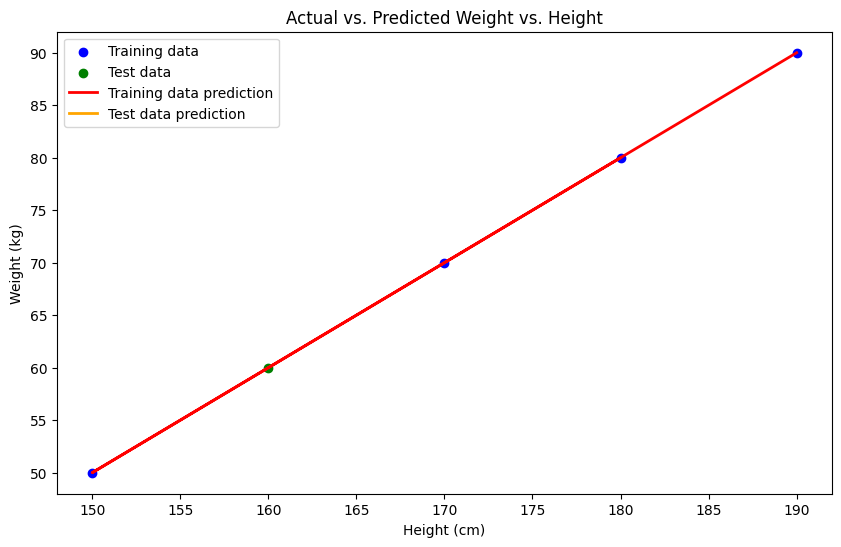

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions for both training and test datasets
y_train_pred = pipe_model.predict(X_train)
y_test_pred = pipe_model.predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Scatter plot for test data
plt.scatter(X_test, y_test, color='green', label='Test data')

# Plot the predicted curve for the training data
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Training data prediction')

# Plot the predicted curve for the test data
plt.plot(X_test, y_test_pred, color='orange', linewidth=2, label='Test data prediction')

# Adding labels and title
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('import matplotlib.pyplot as plt
import numpy as np

# Generate predictions for both training and test datasets
y_train_pred = pipe_model.predict(X_train)
y_test_pred = pipe_model.predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Scatter plot for test data
plt.scatter(X_test, y_test, color='green', label='Test data')

# Plot the predicted curve for the training data
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Training data prediction')

# Plot the predicted curve for the test data
plt.plot(X_test, y_test_pred, color='orange', linewidth=2, label='Test data prediction')

# Adding labels and title
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Actual vs. Predicted Weight vs. Height')
plt.legend()

# Show the plot
plt.show()')
plt.legend()

# Show the plot
plt.show()

### Explanation:

- **Training Data Scatter**: The blue scatter points represent the actual height and weight values from the training data.

- **Test Data Scatter**: The green scatter points represent the actual height and weight values from the test data.

- **Training Data Prediction Curve**: The red line shows the predicted values from the pipeline model for the training data.

- **Test Data Prediction Curve**: The orange line shows the predicted values from the pipeline model for the test data.

- **Visualization**: This will give you a visual representation of how well the pipeline model fits the data and its ability to predict unseen data (test data).

In [23]:
import pickle
from flask import Flask, request, jsonify

app = Flask(__name__)

# Load the saved model
with open('Lab6-Model-Deployment/pipe_model.sav', 'rb') as f:
    pipe_model = pickle.load(f)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    height = data['height']
    prediction = pipe_model.predict([[height]])
    return jsonify({'predicted_weight': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)

ModuleNotFoundError: No module named 'flask'